# I. Reading

In [1]:
import pandas as pd

In [2]:
%%bash

cd /anvil/projects/x-cis220051/corporate/ctb-modeling/data-json/

In [3]:
# read all observations which has temperature
df1 = pd.read_csv('/anvil/projects/x-cis220051/corporate/ctb-modeling/data-json/cynergy/cleanPayloads/modeTemperatureMin.csv')

In [4]:
#original number of obs
len(df1)

2828

# II. Cleaning

In [5]:
# drop some unecessary columns
df1 = df1.drop(columns=[col for col in df1.columns if col.startswith('bird')])
df1 = df1.drop(columns = ['payloadguid', 'creationdate', 'airSpeed', 'ammonia'])

In [6]:
import numpy as np
import pandas as pd
import re

def avg_all_prefixes(df, threshold):
    '''
    Function to take a whole data frame, inspect each columns, if they have the same prefix, i.e., temperature1, temperature10, calculate the average, remove 
    those columns and replaced by a new averaged one
    Params:
      df: the pandas dataframe to be process
      threshold: since the dataset has extreme values, use this threshold to filter it out
    '''
    # dictionary to group columns by prefix
    prefix_dict = {}

    for col in df.columns:
        # extract the text portion before the numbers
        match = re.match(r"([a-zA-Z]+)", col) 
        # if columns have similar prefix, group them into the dictionary
        if match:
            prefix = match.group(1)
            prefix_dict.setdefault(prefix, []).append(col)

    # proces each prefix
    for prefix, relevant_columns in prefix_dict.items():
        # if there are multiple columns, i.e., matching prefixes
        if len(relevant_columns) > 1: 
            def calculate_avg(row):
                valid_values = [val for val in row if not np.isnan(val) and abs(val) <= threshold]
                return np.mean(valid_values) if valid_values else np.nan

            # calculate the average based on the number of valid instances it has
            df[f'avg_{prefix}'] = df[relevant_columns].apply(calculate_avg, axis=1)
            # remove original columns
            df.drop(columns=relevant_columns, inplace=True)

    return df

In [7]:
# call the function, assume the thresold to be 100000
df1 = avg_all_prefixes(df1, 100000)

In [8]:
# after averaging, we found to be many null values
df1

,alarmState,carbonDioxide,culledMortality,cumulativeFeed,cumulativeWater,currentHoused,currentMode,deadMortality,femalesMortality,initialHoused,...,avg_stirFanRuntime,avg_temperature,avg_tunnelFanOffTemperature,avg_tunnelFanOnTemperature,avg_tunnelFanRuntime,avg_variableFanMaxPercentage,avg_variableFanMaxTemperature,avg_variableFanMinPercentage,avg_variableFanMinTemperature,avg_water
0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,85.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,85.93750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,85.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,85.50625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,85.93750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,3.0,1898.0,0.0,0.0,2380760.0,29129.0,1.0,0.0,0.0,30000.0,...,0.0,69.58125,24.428571,25.5,2044.10,100.0,25.625,70.0,22.125,0.0
2824,3.0,1917.0,0.0,0.0,2380760.0,29129.0,1.0,0.0,0.0,30000.0,...,0.0,69.31875,24.428571,25.5,2116.38,100.0,25.625,70.0,22.125,0.0
2825,3.0,1801.0,0.0,0.0,2380760.0,29129.0,1.0,0.0,0.0,30000.0,...,NaN,69.98750,NaN,NaN,NaN,NaN,NaN,NaN,22.500,NaN
2826,3.0,1254.0,0.0,0.0,2380760.0,29129.0,4.0,0.0,0.0,30000.0,...,0.0,74.41875,24.428571,25.5,2107.28,100.0,25.625,70.0,22.125,0.0


In [9]:
# drop columns with more than 50% null values
df1_clean = df1.dropna(thresh=len(df1) * 0.5, axis=1)

In [10]:
df1_clean

,currentMode,modeTemperature,modeTemperatureMax,modeTemperatureMin,setTemperature,staticPressure,avg_temperature
0,0.0,22.7,22.7,22.7,37.8,NaN,85.50000
1,0.0,25.0,25.0,25.0,23.9,NaN,85.93750
2,0.0,22.7,22.7,22.7,37.8,NaN,85.50000
3,0.0,22.7,22.7,22.7,37.8,NaN,85.50625
4,0.0,25.0,25.0,25.0,23.9,NaN,85.93750
...,...,...,...,...,...,...,...
2823,1.0,18.9,31.4,7.9,22.0,0.0,69.58125
2824,1.0,18.3,31.4,7.9,22.0,1.0,69.31875
2825,1.0,20.0,31.4,7.9,22.0,0.0,69.98750
2826,4.0,31.8,31.8,13.0,22.0,2.0,74.41875


In [11]:
# and drop all null rows
final = df1_clean.dropna()

In [12]:
# we are left with 1783 obs
final

,currentMode,modeTemperature,modeTemperatureMax,modeTemperatureMin,setTemperature,staticPressure,avg_temperature
1038,0.0,26.3,26.5,23.8,22.2,4.0,86.17500
1039,0.0,24.5,26.5,24.5,22.2,4.0,85.84375
1040,0.0,25.8,26.5,25.8,22.2,4.0,86.08125
1041,0.0,23.9,26.5,23.8,22.2,4.0,85.73125
1042,0.0,23.3,29.0,21.5,22.2,4.0,85.62500
...,...,...,...,...,...,...,...
2823,1.0,18.9,31.4,7.9,22.0,0.0,69.58125
2824,1.0,18.3,31.4,7.9,22.0,1.0,69.31875
2825,1.0,20.0,31.4,7.9,22.0,0.0,69.98750
2826,4.0,31.8,31.8,13.0,22.0,2.0,74.41875


# III. Augmentation

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_synthetic_anomaly(df, anomaly_ratio=0.05, noise_scale=1, outlier_multiplier=10, random_seed=2802):
    '''
    Function to create a synthetic dataframe given an original one
    Params:
      df: the pandas dataframe to be generated from
      anomaly_ratio: rate of anomaly desired
      noise_scale: rate of noise to scale the data for some variation
      outlier_mutiplier: rate to multiply a normal data point to make it 'abnormal'
      random_seed: constant to ensure the same synthetic set to be generated for every function call
    '''
    np.random.seed(random_seed)

    # calculate mean and std for each columns
    mean_values = df.mean().values
    std_values = df.std().values

    # create synthetic data with the mean and std calculated
    num_rows = len(df)
    num_columns = len(df.columns)
    synthetic_data = np.random.normal(loc=mean_values, scale=std_values, size=(num_rows, num_columns))
    synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)

    # select random rows and mark as anomalies
    anomaly_indices = np.random.choice(num_rows, size=int(num_rows * anomaly_ratio), replace=False)
    synthetic_df['is_anomaly'] = 0 # initialize all rows as normal

    # modify the selected rows to make it abnormal
    for idx in anomaly_indices:
        # multiplying values by a factor to make it as an outlier
        synthetic_df.loc[idx, df.columns] *= outlier_multiplier
        synthetic_df.loc[idx, 'is_anomaly'] = 1  # mark as anomaly

    # add small noise
    noise = np.random.normal(loc=0, scale=noise_scale, size=(num_rows, num_columns))
    synthetic_df[df.columns] += noise * (1 - synthetic_df['is_anomaly'].values[:, None])

    return synthetic_df

In [14]:
# create synthetic test data
test_df = generate_synthetic_anomaly(final)

In [15]:
test_df

,currentMode,modeTemperature,modeTemperatureMax,modeTemperatureMin,setTemperature,staticPressure,avg_temperature,is_anomaly
0,2.686790,24.899812,30.362075,31.770486,21.196756,5.118904,80.791874,0
1,1.968368,26.071402,29.122600,27.182001,18.632083,6.696612,78.419314,0
2,3.194149,26.086569,30.941666,24.442524,19.851239,7.157088,71.671007,0
3,-9.312748,27.307391,29.055044,22.150775,23.209077,4.734150,76.320764,0
4,6.586305,27.473375,29.786208,25.993477,18.807941,7.243550,79.306166,0
...,...,...,...,...,...,...,...,...
1778,0.450998,25.912464,27.996086,22.366968,21.123499,7.271271,83.340061,0
1779,4.413870,24.664433,30.096555,24.376190,21.675995,4.323390,78.790785,0
1780,2.349670,27.905715,30.099939,24.604186,21.065565,5.925651,80.369136,0
1781,-4.028440,21.728707,29.272191,20.231014,21.659004,9.557459,79.393006,0


In [16]:
# ratio of anomaly vs non_anomaly
test_df['is_anomaly'].value_counts()

is_anomaly
0    1694
1      89
Name: count, dtype: int64

# IV. Training and Validation

In [17]:
# preparing the dataset
X_train = final
X_test = test_df.drop(columns=['is_anomaly'])
Y_test = test_df['is_anomaly']

In [18]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report

# training isolation forest
from sklearn.ensemble import IsolationForest

# fit the model
iso_forest = IsolationForest(contamination = 0.05)
iso_forest.fit(X_train)

y_pred_forest = iso_forest.predict(X_test)
y_pred = [1 if pred == -1 else 0 for pred in y_pred_forest]

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1694
           1       0.31      1.00      0.47        89

    accuracy                           0.89      1783
   macro avg       0.65      0.94      0.70      1783
weighted avg       0.97      0.89      0.91      1783



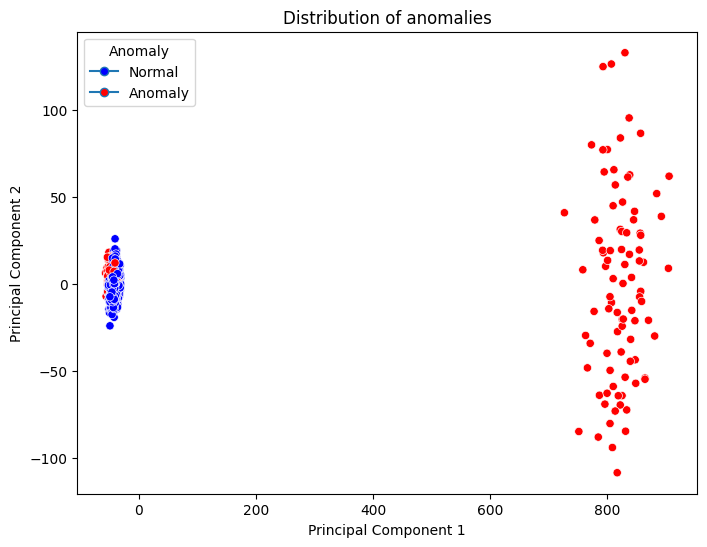

In [31]:
from sklearn.decomposition import PCA

# reduce feature space to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# convert predictions to labels
y_pred = np.array([1 if pred == -1 else 0 for pred in y_pred_forest])

# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_pred, palette={0: "blue", 1: "red"})
plt.title("Distribution of anomalies")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', markerfacecolor='blue', label="Normal"),
    plt.Line2D([0], [0], marker='o', markerfacecolor='red', label="Anomaly")
], title="Anomaly")
plt.show()

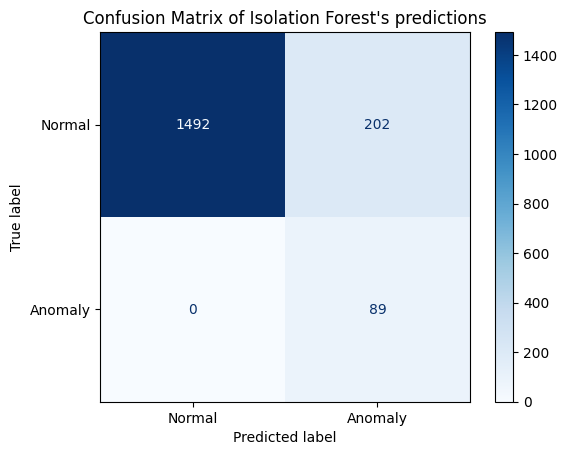

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix of Isolation Forest's predictions")
plt.show()

## Conclusion
- Capture all anomalies, but over-predicting normal data points to be anomalies, explained by the low precision
- We have to use unsupervised methods since in actuality no data will have labels
- Hopefully, by accumulating more data, we can scale up the model to generalize for our observations, and create more complex models